In [1]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
import sys

SOURCE_DIR = os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath(__name__))))
sys.path.insert(0, SOURCE_DIR)

In [3]:
SOURCE_DIR

'/home/husein/dev/malaya-speech'

In [4]:
import malaya_speech
from malaya_speech import Pipeline
from malaya_speech.utils.astype import float_to_int
malaya_speech

`pyaudio` is not available, `malaya_speech.streaming.pyaudio` is not able to use.


<module 'malaya_speech' from '/home/husein/dev/malaya-speech/malaya_speech/__init__.py'>

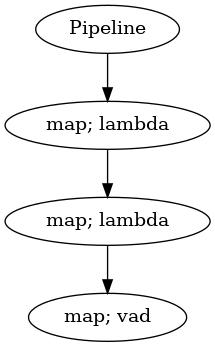

In [5]:
vad_model = malaya_speech.vad.webrtc()
p_vad = Pipeline()
pipeline = (
    p_vad.map(lambda x: malaya_speech.resample(x, old_samplerate = 22050, new_samplerate = 16000))
    .map(lambda x: float_to_int(x, divide_max_abs=False))
    .map(vad_model)
)
p_vad.visualize()

In [7]:
from glob import glob

youtubes = sorted(glob('/home/husein/ssd3/youtube/audio/*.mp3'))
youtubes = sorted(youtubes)
youtubes

['/home/husein/ssd3/youtube/audio/Ajaran Gila Kitab Talmud [paO9Jf-paPw].mp3',
 '/home/husein/ssd3/youtube/audio/Bapak Mertua Gangster! EP #138 - TheCommonFolks [54nQ3QXgYQ8].mp3',
 '/home/husein/ssd3/youtube/audio/Based on True Story of Palestinian Student in Malaysia ： First-Hand War Experience [TWi4a2KV-Mo].mp3',
 '/home/husein/ssd3/youtube/audio/Dalang Disebalik Perang Dunia [xMn_sesSgFs].mp3',
 '/home/husein/ssd3/youtube/audio/Deklarasi Balfour ： Kelahiran Negara Haram Israel [yYVkvNuA02E].mp3',
 '/home/husein/ssd3/youtube/audio/FBI Lari Nampak Tabligh [Ghf7-x8uAtw].mp3',
 '/home/husein/ssd3/youtube/audio/Hegemoni Zi0nis Di Hollywood [DzitakSz_jw].mp3',
 '/home/husein/ssd3/youtube/audio/How This Ah Beng Made $1,000,000 Before Turning 30 Ft. Mayiduo ｜ TDK Podcast #210 [Ptvtxqv0gTw].mp3',
 '/home/husein/ssd3/youtube/audio/Is he a p＊do？! The Full Story of What Happened To Dee Kosh [vTzH6WCfBs8].mp3',
 "/home/husein/ssd3/youtube/audio/Israel ： The New 'Silicon Valley' [PPKHjLRSKCc].mp

In [8]:
import whisper

model = whisper.load_model('large-v2')

In [9]:
from whisper.audio import (
    FRAMES_PER_SECOND,
    HOP_LENGTH,
    N_FRAMES,
    N_SAMPLES,
    SAMPLE_RATE,
    log_mel_spectrogram,
    pad_or_trim,
)

def detect_lang(x):
    mel = log_mel_spectrogram(y.astype('float32'), padding=N_SAMPLES)
    content_frames = mel.shape[-1] - N_FRAMES
    mel_segment = pad_or_trim(mel, N_FRAMES).to('cuda')
    _, probs = model.detect_language(mel_segment)
    return probs

In [10]:
y = malaya_speech.load('/home/husein/dev/malaya-speech/speech/example-speaker/husein-zolkepli.wav', sr = 16000)[0]

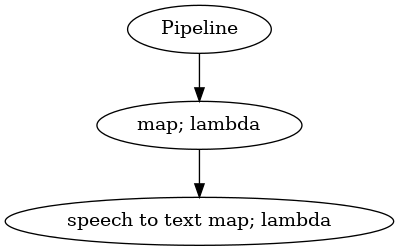

In [11]:
p_asr = Pipeline()
resample = p_asr.map(lambda x: malaya_speech.resample(x, old_samplerate = 22050, new_samplerate = 16000))
p = resample.map(lambda x: (
    detect_lang(x),
    model.transcribe(x.astype('float32'), task = 'transcribe', language = 'ms'),
    model.transcribe(x.astype('float32'), task = 'transcribe', language = 'en'),
), name = 'speech-to-text')
p_asr.visualize()

In [12]:
y = malaya_speech.load('/home/husein/dev/malaya-speech/speech/example-speaker/husein-zolkepli.wav', sr = 22050)[0]

In [13]:
p_asr(y)['speech-to-text']

({'ln': 0.00030045805033296347,
  'su': 0.00011364376405254006,
  'tt': 1.6366511772503145e-06,
  'ko': 0.00030599598539993167,
  'ka': 8.601722583989613e-06,
  'ht': 0.0037412315141409636,
  'eu': 1.4504192222375423e-05,
  'el': 6.403267616406083e-05,
  'si': 0.00020464169210754335,
  'et': 4.332884600444231e-06,
  'de': 0.0015614362200722098,
  'mg': 3.358373987794039e-07,
  'af': 3.4661305107874796e-05,
  'lt': 8.882307156454772e-06,
  'sr': 4.682869985117577e-06,
  'so': 2.8468155051086796e-06,
  'yi': 5.956028871878516e-06,
  'km': 0.0006423693848773837,
  'hy': 3.873963942169212e-05,
  'id': 0.0038747733924537897,
  'ru': 0.0002895639627240598,
  'te': 2.0325713194324635e-05,
  'sa': 6.634739838773385e-05,
  'ta': 4.902168075204827e-05,
  'tl': 0.0020482514519244432,
  'am': 1.839123069657944e-05,
  'as': 8.608365897089243e-05,
  'th': 0.0002541006251703948,
  'ro': 0.0006026357877999544,
  'hr': 7.0581018007942475e-06,
  'mn': 3.1285999284591526e-05,
  'vi': 0.000504940107930451

In [14]:
from unidecode import unidecode
import torchaudio
import torch
import pickle
import random

In [15]:
# f = glob('/home/husein/youtube/audio/(LANGSUNG)*')[2]
# samples = malaya_speech.streaming.torchaudio.stream(f,
#                                                         vad_model = p_vad,
#                                                         asr_model = p_asr,
#                                                         segment_length = 441,
#                                                         realtime_print = True,
#                                                         sample_rate = 22050,
#                                                         min_length = 3.0,
#                                                         max_length = 15.0)

In [16]:
# len(samples)

In [17]:
# import IPython.display as ipd
# ipd.Audio(samples[1]['wav_data'], rate = 22050)

In [18]:
# samples[3]

In [19]:
parent_dir = '/home/husein/ssd2/processed-youtube-asr-whisper-large-test-set'
# !rm -rf {parent_dir}
!mkdir {parent_dir}

mkdir: cannot create directory ‘/home/husein/ssd2/processed-youtube-asr-whisper-large-test-set’: File exists


In [20]:
parent_dir_done = '/home/husein/ssd2/processed-youtube-asr-whisper-large-test-set-done'
# !rm -rf {parent_dir_done}
!mkdir {parent_dir_done}

mkdir: cannot create directory ‘/home/husein/ssd2/processed-youtube-asr-whisper-large-test-set-done’: File exists


In [21]:
from tqdm import tqdm

In [22]:
for f in tqdm(youtubes):
    
    new_f = unidecode(os.path.split(f)[1].replace('.mp3', '').replace(' ', '_').replace('|', '_'))
    new_f = new_f.replace('/', '_')
    f_done = os.path.join(parent_dir_done, new_f)
    
    if os.path.exists(f_done):
        continue
    
    samples = malaya_speech.streaming.torchaudio.stream(f, mode_utterence = False,
                                                        vad_model = p_vad,
                                                        asr_model = p_asr,
                                                        segment_length = 441,
                                                        realtime_print = False,
                                                        sample_rate = 22050,
                                                        min_length = 30.0,
                                                        max_length = 30.0
                                                       )
    
    if len(samples):
        
        parent_new_f = os.path.join(parent_dir, new_f)
        os.makedirs(parent_new_f, exist_ok=True)

        for i in range(len(samples)):
            audio_path = os.path.join(parent_new_f, f'{i}.mp3')
            torchaudio.save(audio_path, 
                            torch.tensor(samples[i]['wav_data'].astype('float32')).unsqueeze(0), 
                            22050, format='mp3')
            samples[i]['wav_data'] = audio_path

        with open(f'{parent_new_f}.pkl', 'wb') as fopen:
            pickle.dump(samples, fopen)
            
    with open(f_done, 'w') as fopen:
        fopen.write('done')

100%|████████████████████████████████████████| 26/26 [1:12:13<00:00, 166.68s/it]
